In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('FishData')

In [3]:
df

,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna
...,...,...,...
995,3.710186,0.956612,salmon
996,3.749596,9.557450,salmon
997,2.410087,3.355781,tuna
998,0.990773,3.812210,tuna


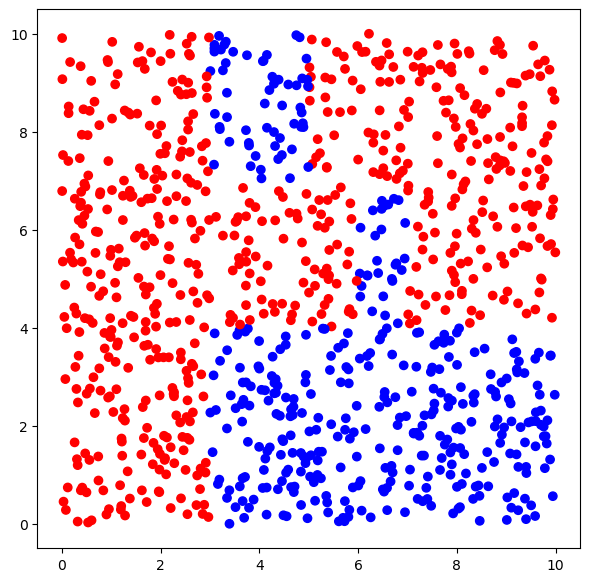

In [4]:
#Scatter plot
plt.figure(figsize=(7,7))
plt.scatter(df.length, df.weight, color=['red' if t == 'tuna' else 'blue' for t in df.type])

In [5]:
#Replace fish type with 0, 1
df.type = df.type.apply(lambda t: 1 if t == 'salmon' else 0)

In [6]:
def get_entropy(vals):
    #Because the list is only 0 and 1, mean returns the proportion of 1's 
    p = np.mean(vals)
    #Catch list of all 0's or all 1's
    if p==0 or p==1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [8]:
def get_entropy_from_split(df, feature, val):
    left_types = df[df[feature] < val].type
    right_types = df[df[feature] >= val].type
    
    left_entropy = get_entropy(left_types)
    right_entropy = get_entropy(right_types)
    
    left_prop = len(left_types) / len(df)
    right_prop = len(right_types) / len(df)
    
    return left_prop*left_entropy + right_prop*right_entropy

In [13]:
#Uncomment for next split, change varible name in following box

curr_df = df.copy()
curr_df = curr_df[(curr_df.length > 3) & (curr_df.weight > 4)]




In [14]:
#Choose the feature, there are only two in this example
features = ['length', 'weight']

#Create a dictionary to store the best parameters
best_params = {'feature': None, 'val':None, 'entropy': np.inf}

for f in features:
    #Variable for current position, start at smallest value in that feature
    curr = curr_df[f].min()
    #Set step size, smaller may be more accurate but more resource intensive
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params)
        
    

{'feature': 'length', 'val': 7.008879131610914, 'entropy': 0.5524718527527053}
